In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from jupyterworkflow.data import get_fremont_data

In [2]:
# url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
# filename = 'fremont.csv'

# def download_fremont_data(filename=filename, url=url, force_download=False):
#     if force_download or not os.path.exists(filename):
#         urlretrieve(url, 'fremont.csv')
    
#     cols = ["Date", "Fremont Bridge East Sidewalk", "Fremont Bridge West Sidewalk"]
#     data = pd.read_csv('fremont.csv', index_col='Date', parse_dates=True, usecols=cols)
#     data.columns = ['East', 'West']
#     data['Total'] = data['East'] + data['West']
#     return data



In [3]:
#!head -n 6 fremont.csv

In [4]:
data = get_fremont_data()
data.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


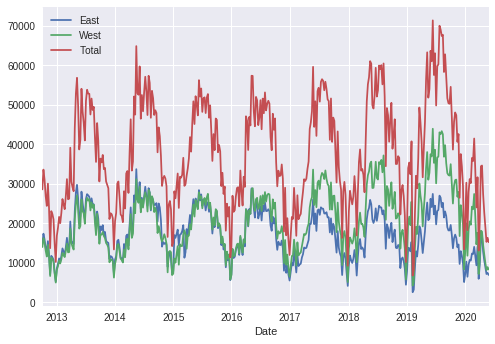

In [5]:
data.resample('W').sum().plot()

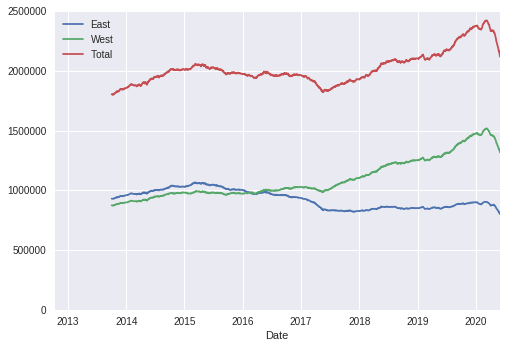

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None);

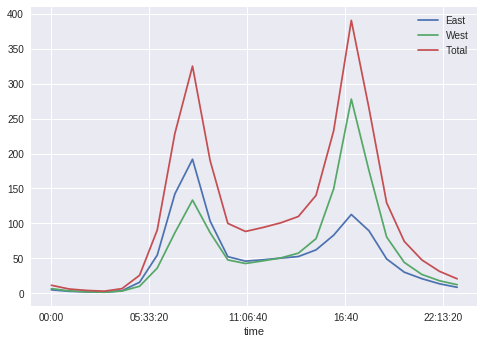

In [7]:
data.groupby(data.index.time).mean().plot();

In [8]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


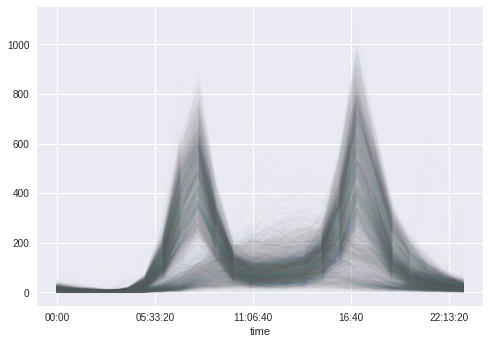

In [9]:
pivoted.plot(legend=False, alpha=0.01);

In [10]:
get_fremont_data?

Signature:
get_fremont_data(
    filename='fremont.csv',
    url='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD',
    force_download=False,
)
Docstring:
Download and cache the Fremont bike data

Parameters
----------
filename: string (optional)
    Location of the downloaded file

url: string (optional)
    Web location of the data
    
force_download: bool (optional)
    if True, force re-download of the data

Returns
-------
data: pandas.DataFrame
    The Fremont bridge data 
        index: Date (datetime)
        columns: East, West, Total (number)
File:      ~/work/reprod-ds/JupyterWorkflow/jupyterworkflow/data.py
Type:      function


In [ ]:
get_fremont_data()